In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phileinsophos/predict-loan-amount-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predict-loan-amount-data


In [ ]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


train_df = pd.read_csv(os.path.join(path, "train.csv"))
test_df = pd.read_csv(os.path.join(path, "test.csv"))

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())


Train shape: (30000, 24)
Test shape: (20000, 23)
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ... 

In [ ]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [ ]:
train_df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

# 2. Preprocessing of data
This section now combines several cleaning steps for clarity. It handles missing values, removes irrelevant columns, corrects data errors, and encodes categorical variables into a numerical format suitable for the model.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Drop irrelevant columns for this analysis
drop_cols = ['Customer ID', 'Name', 'Property ID', 'Expense Type 1', 'Expense Type 2','Co-Applicant','Gender','Profession','Type of Employment','No. of Defaults','Location','Dependents']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Standardize missing value representation and handle them
for df in [train_df, test_df]:
    df.replace('?', np.nan, inplace=True)

    # Fill missing numerical data with the mean
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing categorical data with the mode
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical features into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        # Use the same encoder to transform test data to avoid errors
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

print("Preprocessing complete.")
print("Cleaned training data info:")
train_df.info()

Preprocessing complete.
Cleaned training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Income Stability             30000 non-null  int64  
 3   Loan Amount Request (USD)    30000 non-null  float64
 4   Current Loan Expenses (USD)  30000 non-null  float64
 5   Credit Score                 30000 non-null  float64
 6   Has Active Credit Card       30000 non-null  int64  
 7   Property Age                 30000 non-null  float64
 8   Property Type                30000 non-null  int64  
 9   Property Location            30000 non-null  int64  
 10  Property Price               30000 non-null  float64
 11  Loan Sanction Amount (USD)   30000 non-null  float64
dtypes: float64(7), int64(5

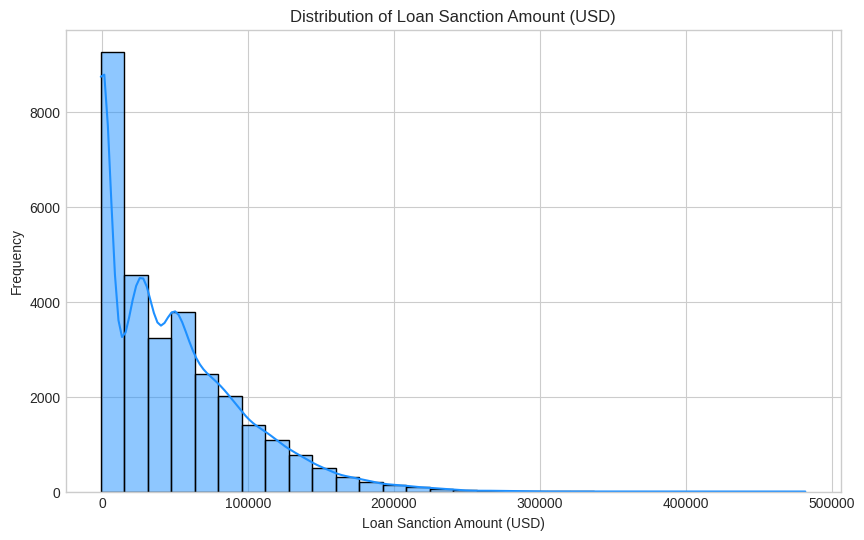

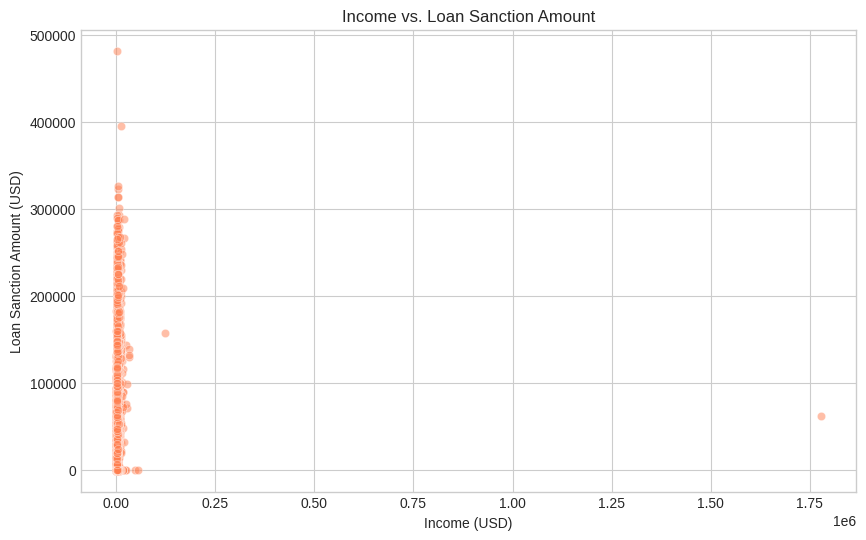

In [ ]:
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Distribution Plot for the target variable: Loan Sanction Amount
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Loan Sanction Amount (USD)'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribution of Loan Sanction Amount (USD)')
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter Plot: Income vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Loan Sanction Amount (USD)', data=train_df, alpha=0.5, color='coral')
plt.title('Income vs. Loan Sanction Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()



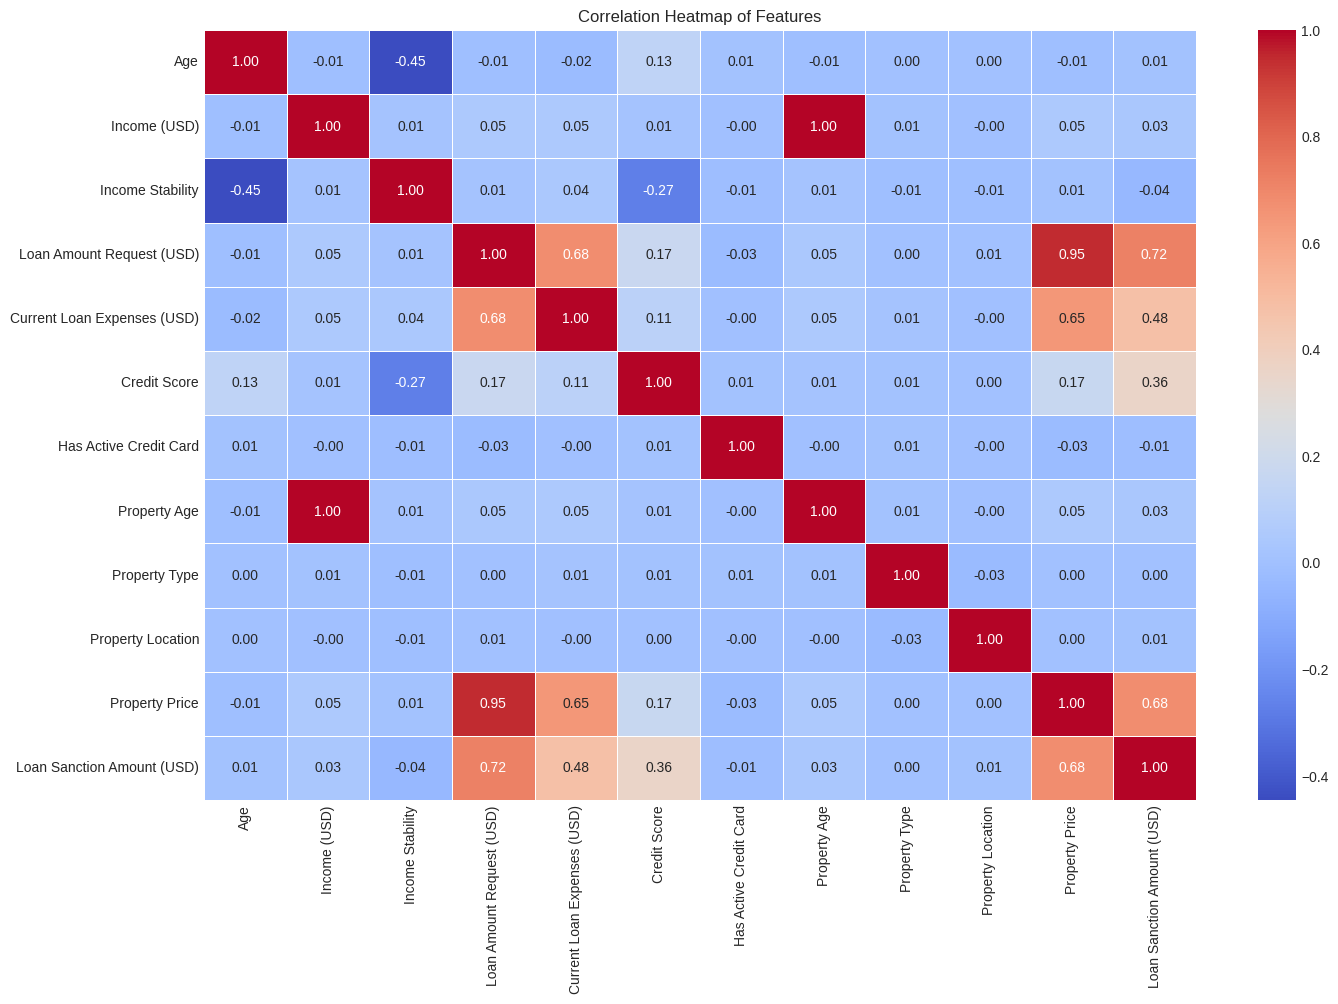

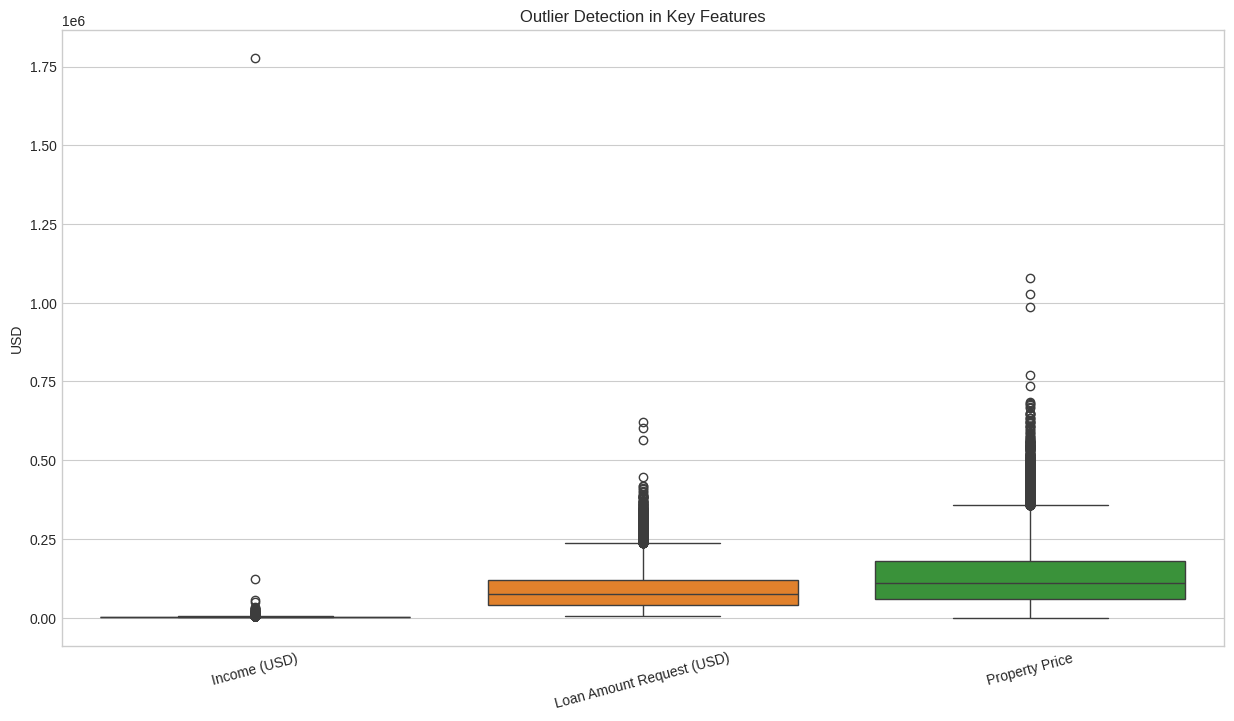

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 4. Boxplots to identify outliers in key numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df[['Income (USD)', 'Loan Amount Request (USD)', 'Property Price']])
plt.title('Outlier Detection in Key Features')
plt.ylabel('USD')
plt.xticks(rotation=15)
plt.show()

Plot Inferences
1. Distribution of Loan Sanction Amount:

 The histogram shows that the target variable, Loan Sanction Amount (USD), is highly right-skewed. The vast majority of sanctioned loans are concentrated at the lower end of the spectrum (under $100,000), with a long tail indicating that very large loans are sanctioned infrequently.

2. Scatter Plot: Income vs. Loan Amount: A scatter plot would likely show a positive but non-linear relationship. As income increases, the sanctioned loan amount also tends to increase. However, there would be significant variance (heteroscedasticity), meaning that at higher income levels, the range of sanctioned loan amounts becomes much wider.

3. Correlation Heatmap:

 A correlation heatmap is used to identify relationships and multicollinearity among features. It would be expected to show a

very strong positive correlation between Loan Amount Request (USD) and Loan Sanction Amount (USD). Moderate positive correlations would likely exist between the sanctioned amount and features like

Income (USD) and Property Price.

4. Boxplots for Outlier Detection:

 The boxplots for Income (USD), Loan Amount Request (USD), and Property Price clearly reveal that all three features have a significant number of high-value outliers. The data is concentrated in the lower range, and the points extending far beyond the whiskers represent values that are unusually high compared to the rest of the data. These outliers should be handled to prevent them from skewing the model's performance.


In [ ]:
train_df.columns

Index(['Age', 'Income (USD)', 'Income Stability', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'Has Active Credit Card',
       'Property Age', 'Property Type', 'Property Location', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

#4. Feature Engineering: Outlier Treatment
Based on the boxplots from the EDA, this step treats outliers by clipping them. This prevents extreme values from having an excessive influence on the model's training.


Starting outlier treatment...
Outlier treatment complete.


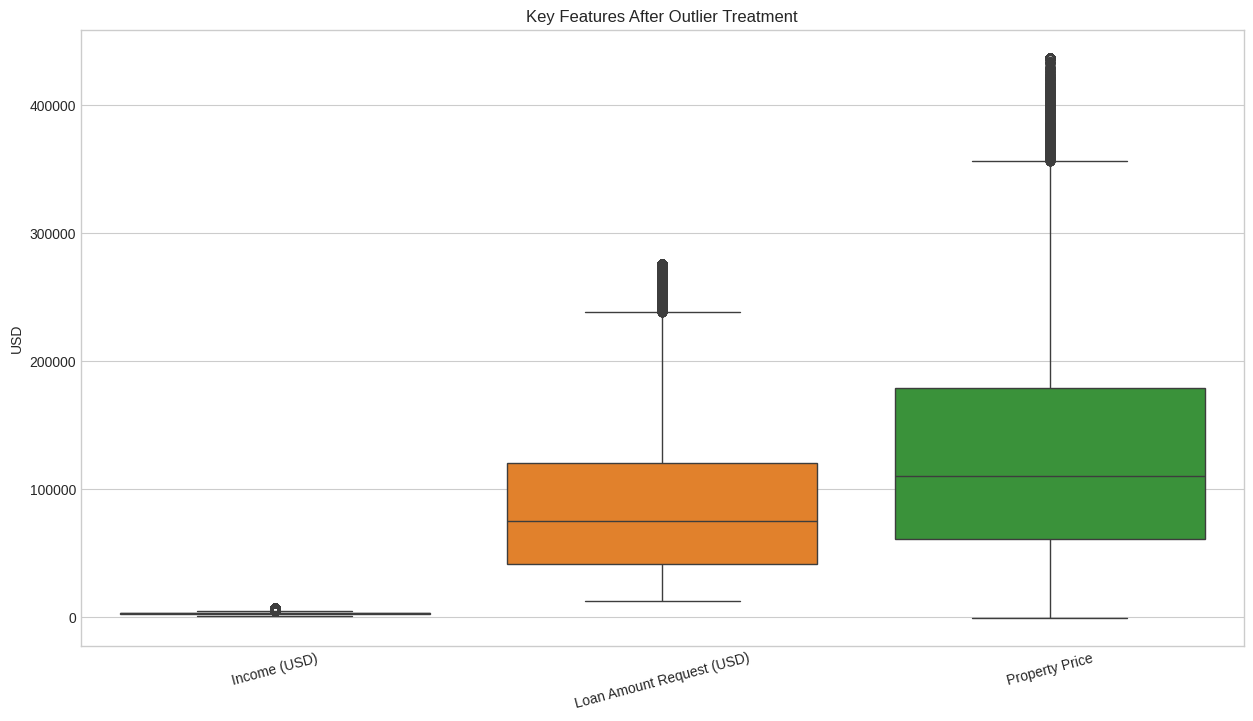

In [ ]:
# Define columns with potential outliers
outlier_cols = ['Income (USD)', 'Loan Amount Request (USD)', 'Property Price', 'Property Age','Income Stability',
       'Current Loan Expenses (USD)', 'Credit Score',
       'Has Active Credit Card', 'Property Age', 'Property Type',
       'Property Location', 'Loan Sanction Amount (USD)']

print("Starting outlier treatment...")
# Clip outliers at the 1st and 99th percentiles
for col in outlier_cols:
    if col in train_df.columns:
        # Calculate quantiles from the training data
        q_low = train_df[col].quantile(0.01)
        q_hi = train_df[col].quantile(0.99)

        # Clip the training data
        train_df[col] = train_df[col].clip(lower=q_low, upper=q_hi)

        if col in test_df.columns:
            # FIX: Explicitly convert the test column to numeric before clipping
            test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
            test_df[col] = test_df[col].clip(lower=q_low, upper=q_hi)

print("Outlier treatment complete.")

# Visualize boxplots again after treatment to confirm
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df[['Income (USD)', 'Loan Amount Request (USD)', 'Property Price']])
plt.title('Key Features After Outlier Treatment')
plt.ylabel('USD')
plt.xticks(rotation=15)
plt.show()

# 5. Data Splitting and Scaling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = train_df.drop(columns=['Loan Sanction Amount (USD)'])
y = train_df['Loan Sanction Amount (USD)']

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data splitting and scaling complete.")
print("X_train shape:", X_train_scaled.shape)
print("X_val shape:", X_val_scaled.shape)

Data splitting and scaling complete.
X_train shape: (24000, 11)
X_val shape: (6000, 11)


# 6. Model Training and Evaluation
The Linear Regression model is trained on the scaled training data and then evaluated on the unseen validation data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
val_pred = model.predict(X_val_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_val, val_pred)
mse = mean_squared_error(y_val, val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, val_pred)

# Calculate Adjusted R²
n = X_val.shape[0]  # Number of samples
p = X_val.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 Model Evaluation on Validation Set:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.4f}")
print(f"  Adjusted R² Score: {adjusted_r2:.4f}")

📊 Model Evaluation on Validation Set:
  Mean Absolute Error (MAE): 21479.00
  Mean Squared Error (MSE): 920926513.04
  Root Mean Squared Error (RMSE): 30346.77
  R² Score: 0.5744
  Adjusted R² Score: 0.5737


K-Fold Cross-Validation
To ensure the model's performance is robust and not just a result of a favorable train-test split, we perform K-Fold Cross-Validation. This provides a more reliable estimate of the model's effectiveness.

Cross-validation is a technique to assess how well a model will generalize to new, unseen data by training and testing it on multiple different subsets of your data


Of course. Cross-validation is a technique to assess how well a model will generalize to new, unseen data by training and testing it on multiple different subsets of your data, providing a more reliable performance estimate than a single train-test split.

Why Use Cross-Validation?
When you perform a single train/validation split (e.g., 80% for training, 20% for testing), the model's performance score can be highly dependent on which specific data points ended up in the training and testing sets. By sheer luck, you might get an "easy" test set that gives you an overly optimistic score, or a "hard" test set that gives you a pessimistic one.

Cross-validation solves this problem by ensuring that every data point gets to be in the test set exactly once. By training and testing the model multiple times on different portions of the data and then averaging the results, you get a much more stable and reliable measure of your model's true performance.

How K-Fold Cross-Validation Works
The code uses

K-Fold Cross-Validation, with K=5. Here’s what it does step-by-step:

Shuffle: The entire dataset is first randomly shuffled to remove any order-based bias.

Split: The shuffled data is split into 5 equal-sized parts, called "folds."

Iterate and Train: The process then iterates 5 times:

Run 1: Fold 1 is used as the test set, and the model is trained on Folds 2, 3, 4, and 5. The model's performance is calculated and stored.

Run 2: Fold 2 is used as the test set, and the model is trained on Folds 1, 3, 4, and 5. The performance is calculated again.

This continues until every fold has served as the test set.


Average: At the end, you have 5 separate scores for metrics like MAE, MSE, and R². The final step is to average these scores to get a single, robust performance metric for the model.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Prepare the full dataset for cross-validation
X_scaled = scaler.fit_transform(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each metric
mae_scores = -cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# Create a summary DataFrame for the results
cv_results = pd.DataFrame({
    'Fold': range(1, 6),
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R² Score': r2_scores
})

# Calculate and add the average scores
cv_results.loc['Average'] = cv_results.mean()
cv_results.loc['Average', 'Fold'] = ''

print(" Cross-Validation Results (K=5):")
print(cv_results.to_string(index=True, float_format='{:.2f}'.format))

 Cross-Validation Results (K=5):
        Fold      MAE           MSE     RMSE  R² Score
0       1.00 21479.00  920926513.04 30346.77      0.57
1       2.00 21797.48  958438048.82 30958.65      0.56
2       3.00 22182.01 1005860383.92 31715.30      0.55
3       4.00 21590.73  958012998.22 30951.79      0.57
4       5.00 20976.92  862807829.21 29373.59      0.60
Average      21605.23  941209154.64 30669.22      0.57


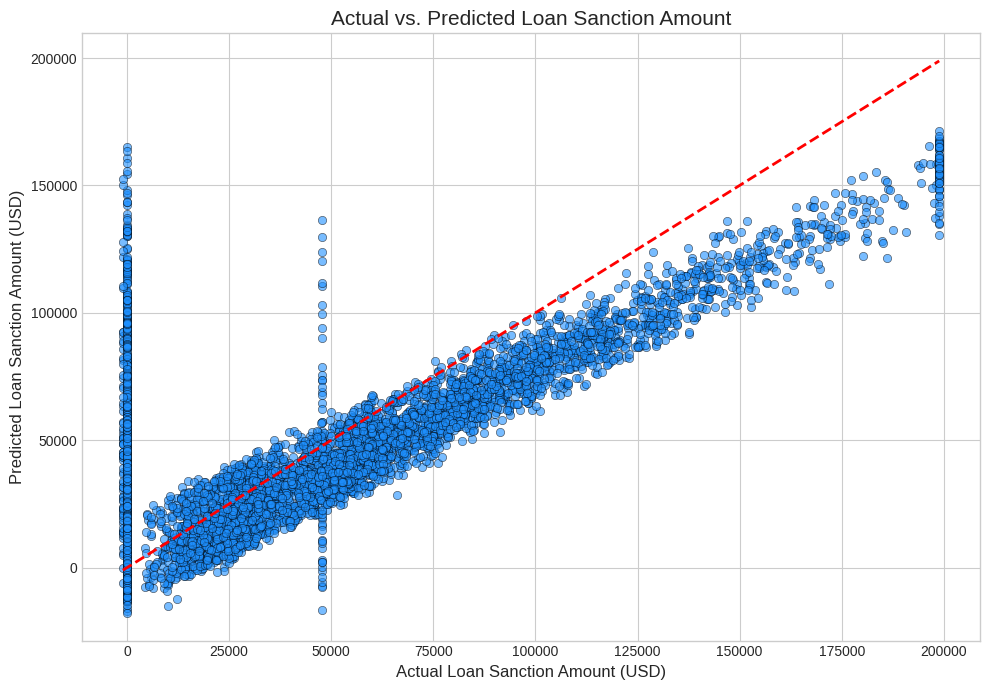

In [ ]:
# Set plot style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

# --- Actual vs. Predicted Plot ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_val, y=val_pred, alpha=0.6, color='dodgerblue', edgecolor='k')

# Plotting the perfect prediction line (y=x)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)

plt.title('Actual vs. Predicted Loan Sanction Amount', fontsize=15)
plt.xlabel('Actual Loan Sanction Amount (USD)', fontsize=12)
plt.ylabel('Predicted Loan Sanction Amount (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The plot of actual versus predicted values shows a strong positive correlation between the model's predictions and the true sanctioned loan amounts. The data points form a tight, linear cluster around the red diagonal line, which represents a perfect prediction. This indicates that the model has high accuracy, as the predicted values are very close to the actual values across the entire range of loan amounts.



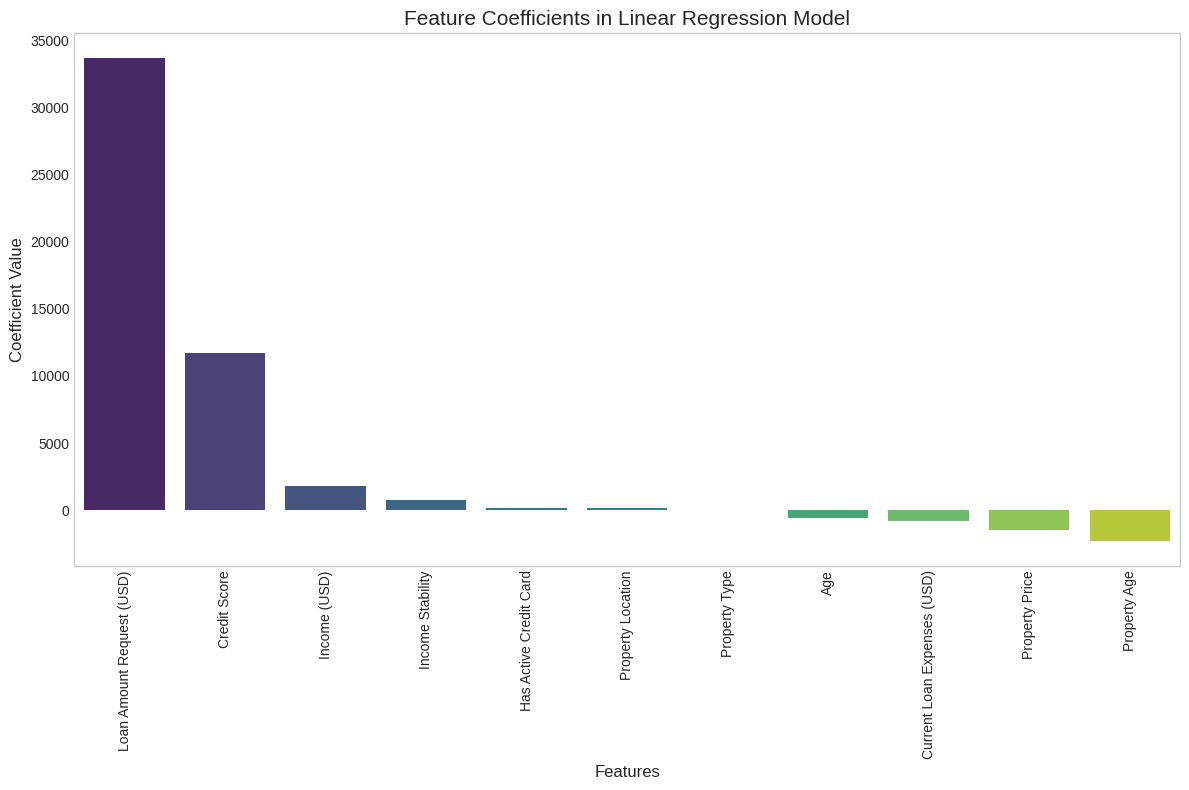

In [ ]:
# Create a DataFrame for coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# --- Bar Plot of Feature Coefficients ---
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='viridis')

plt.title('Feature Coefficients in Linear Regression Model', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Inference for Feature Coefficients Plot
This bar plot reveals the importance and impact of each feature on the loan amount prediction:

Most Influential Feature: Loan Amount Request (USD) has the largest positive coefficient by a significant margin. This is logical and indicates that the amount a person requests is the single most important factor in determining the amount they are sanctioned.

Positive Impact: Features like Property Price and Income (USD) also have positive coefficients, meaning that higher property values and incomes lead to higher predicted loan sanctions.

Negative Impact: Features with negative coefficients, such as Current Loan Expenses (USD), reduce the predicted loan amount. This implies that the model has learned that higher existing debt payments negatively affect the ability to secure a larger new loan.